In [18]:
import pandas as pd

In [19]:
df = pd.read_csv("datasets/StudentPerformanceFactors.csv")
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [20]:
df.shape

(6607, 20)

In [21]:
df.isnull().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

In [22]:
df.dropna(how="any", inplace=True)
df.isnull().sum()

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64

In [23]:
df.shape

(6378, 20)

In [24]:
# checking all types of inputs from every column in the dataframe
for column in df:
    print(df[column].unique())

[23 19 24 29 25 17 21  9 10 14 22 15 12 20 11 13 16 18 31  8 26 28  4 35
 27 33 36 43 34  1 30  7 32  6 38  5  3 39  2 37 44]
[ 84  64  98  89  92  88  78  94  80  97  83  82  68  60  70  75  99  74
  65  62  91  90  66  69  72  63  61  86  77  71  67  87  73  96 100  81
  95  79  85  76  93]
['Low' 'Medium' 'High']
['High' 'Medium' 'Low']
['No' 'Yes']
[ 7  8  6 10  9  5  4]
[ 73  59  91  98  65  89  68  50  80  71  88  87  97  72  74  70  82  58
  99  84 100  75  54  90  94  51  57  66  96  93  56  52  63  79  81  69
  95  60  92  77  62  85  78  64  76  55  86  61  53  83  67]
['Low' 'Medium' 'High']
['Yes' 'No']
[0 2 1 3 4 5 6 7 8]
['Low' 'Medium' 'High']
['Medium' 'High' 'Low']
['Public' 'Private']
['Positive' 'Negative' 'Neutral']
[3 4 2 1 5 0 6]
['No' 'Yes']
['High School' 'College' 'Postgraduate']
['Near' 'Moderate' 'Far']
['Male' 'Female']
[ 67  61  74  71  70  66  69  72  68  65  64  60  63  62 100  76  79  73
  78  89  75  59  86  97  83  84  80  58  94  55  92  82  77 101  8

In [25]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [26]:
scaler = StandardScaler()

Initializing the scaler

In [67]:
df = pd.read_csv("datasets/StudentPerformanceFactors.csv", index_col = "Attendance")
df

,Hours_Studied,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
Attendance,,,,,,,,,,,,,,,,,,,
84,23,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
64,19,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
98,24,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
89,29,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
92,19,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,25,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
76,23,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
90,20,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68


In [68]:
df.describe()


,Hours_Studied,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [69]:
df[['Hours_Studied_T', 'Exam_Score_T', 'Sleep_Hours_T', 'Tutoring_Sessions_T', 'Physical_Activity_T', 'Previous_Scores_T']] = scaler.fit_transform(df[['Hours_Studied', 'Exam_Score', 'Sleep_Hours', 'Tutoring_Sessions', 'Physical_Activity', 'Previous_Scores']])

Transform data, with added _T as label to indicate the transformed data

In [83]:
df

,Hours_Studied,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,...,Distance_from_Home,Gender,Exam_Score,Hours_Studied_T,Exam_Score_T,Sleep_Hours_T,Tutoring_Sessions_T,Physical_Activity_T,Previous_Scores_T,kmeans_5
Attendance,,,,,,,,,,,,,,,,,,,,,
84,23,Low,High,No,7,73,Low,Yes,0,Low,...,Near,Male,67,0.504942,-0.060578,-0.019796,-1.213934,0.031411,-0.143800,1
64,19,Low,Medium,No,8,59,Low,Yes,2,Medium,...,Moderate,Female,61,-0.162822,-1.602931,0.661399,0.411451,1.001199,-1.116110,1
98,24,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,...,Near,Male,74,0.671882,1.738833,-0.019796,0.411451,1.001199,1.106313,3
89,29,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,...,Moderate,Male,71,1.506587,0.967657,0.661399,-0.401242,1.001199,1.592469,3
92,19,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,...,Near,Female,70,-0.162822,0.710598,-0.700990,1.224144,1.001199,-0.699406,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,25,High,Medium,No,7,76,Medium,Yes,1,High,...,Near,Female,68,0.838823,0.196481,-0.019796,-0.401242,-0.938377,0.064552,3
76,23,High,Medium,No,8,81,Medium,Yes,3,Low,...,Near,Female,69,0.504942,0.453539,0.661399,1.224144,-0.938377,0.411806,1
90,20,Medium,Low,Yes,6,65,Low,Yes,3,Low,...,Near,Female,68,0.004119,0.196481,-0.700990,1.224144,-0.938377,-0.699406,1


Applying KMeans. This is an iterative code that will reduce the inertia of the cluster so it could determine the most optimum cluster


In [84]:
def optimize_kmeans(data, max_k):
    means=[]
    inertias=[]
    for k in range(1, max_k):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(data)
        means.append(k)
        inertias.append(kmeans.inertia_)

    #Generating elbow plot
    fig = plt.subplots(figsize=(10,5))
    plt.plot(means, inertias, 'o-')
    plt.xlabel('Num of Clusters')
    plt.ylabel('Inertia')
    plt.grid(True)
    plt.show()

c:\Users\Magda\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Magda\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Magda\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Magda\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

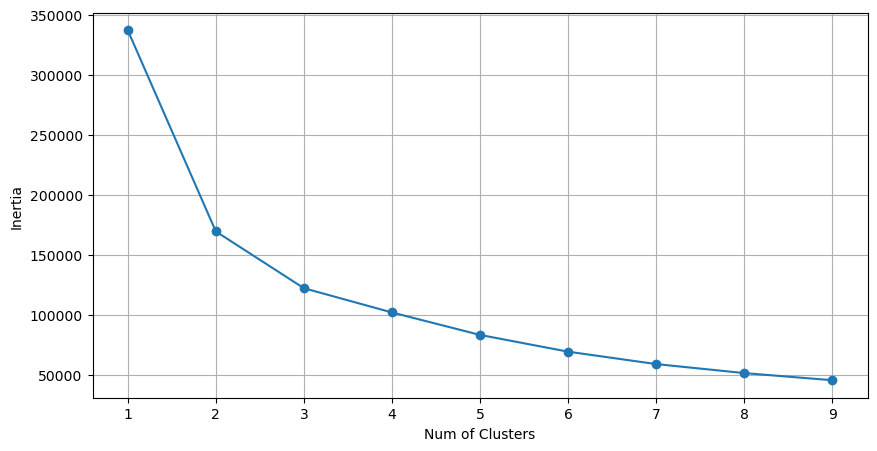

In [85]:
optimize_kmeans(df[['Hours_Studied', 'Exam_Score']], 10)

Optimum: Around 5 or 6

In [101]:
kmeans = KMeans(n_clusters = 5)
kmeans.fit(df[['Hours_Studied', 'Exam_Score']])

c:\Users\Magda\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=5)

In [102]:
df['kmeans_5'] = kmeans.labels_
df

,Hours_Studied,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,...,Distance_from_Home,Gender,Exam_Score,Hours_Studied_T,Exam_Score_T,Sleep_Hours_T,Tutoring_Sessions_T,Physical_Activity_T,Previous_Scores_T,kmeans_5
Attendance,,,,,,,,,,,,,,,,,,,,,
84,23,Low,High,No,7,73,Low,Yes,0,Low,...,Near,Male,67,0.504942,-0.060578,-0.019796,-1.213934,0.031411,-0.143800,1
64,19,Low,Medium,No,8,59,Low,Yes,2,Medium,...,Moderate,Female,61,-0.162822,-1.602931,0.661399,0.411451,1.001199,-1.116110,0
98,24,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,...,Near,Male,74,0.671882,1.738833,-0.019796,0.411451,1.001199,1.106313,4
89,29,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,...,Moderate,Male,71,1.506587,0.967657,0.661399,-0.401242,1.001199,1.592469,4
92,19,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,...,Near,Female,70,-0.162822,0.710598,-0.700990,1.224144,1.001199,-0.699406,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,25,High,Medium,No,7,76,Medium,Yes,1,High,...,Near,Female,68,0.838823,0.196481,-0.019796,-0.401242,-0.938377,0.064552,1
76,23,High,Medium,No,8,81,Medium,Yes,3,Low,...,Near,Female,69,0.504942,0.453539,0.661399,1.224144,-0.938377,0.411806,1
90,20,Medium,Low,Yes,6,65,Low,Yes,3,Low,...,Near,Female,68,0.004119,0.196481,-0.700990,1.224144,-0.938377,-0.699406,1


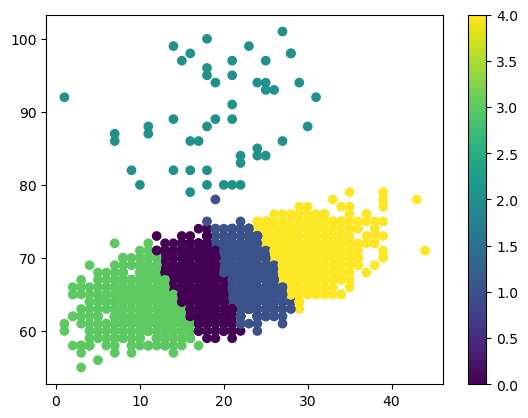

In [104]:
scatter = plt.scatter(x=df['Hours_Studied'], y=df['Exam_Score'], c=df['kmeans_5'], cmap='viridis')
plt.colorbar(scatter)
